In [ ]:
from speechsep.imports import *
from speechsep.data import *
from speechsep.core import *
from speechsep.masks import *

In [ ]:
class SiameseSpec(Tuple):
    def show(self, ctx=None, **kwargs):
        self[0].show()
        self[1].show()

In [ ]:
class SiamesePiar(Transform):
    def __init__(self, items, labels):
        store_attr(self, 'items,labels')
        self.assoc = self
        sortlbl = sorted(enumerate(labels), key=itemgetter(1))
        self.clsmap = {k:L(v).itemgot(0) for k,v in itertools.groupby(sortlbl, key=itemgetter(1))}
        self.idxs = range_of(self.items)
        
    def encodes(self,i)->None:
        othercls=self.clsmap[self.labels[i]] if random.random()>0.5 else self.idxs
        otherit = random.choice(othercls)
        return SiameseSpec(self.items[i], self.items[otherit])

In [ ]:
items = get_audio_files("../data/SmallDataset/")

In [ ]:
sp = SiamesePiar(items, items.map(parent_label))
maskify = Transform(MaskBinary.create, as_item=True)
pipe = Pipeline([sp, AudioMono.create, Resample(22050), Clip(5), Maskify()])

In [ ]:
a = pipe(0)

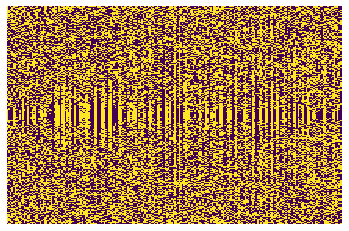

In [ ]:
a[1][0].show()

In [ ]:
a[0]

(../data/SmallDataset/esc50_sample/dog/2-117271-A-0.wav, 5.0secs at 22050 samples per second,
 ../data/SmallDataset/esc50_sample/cat/3-146964-A-5.wav, 5.0secs at 22050 samples per second)

In [ ]:
spec_list = [Spectify()(aud) for aud in a[0]]
b = [seg*m for seg,m in zip(spec_list,a[1])]

In [ ]:
list(zip(spec_list, a[1]))

[(<speechsep.core.SpecImage at 0x7f81766e1610>,
  <speechsep.masks.MaskBinary at 0x7f8176fcd250>),
 (<speechsep.core.SpecImage at 0x7f8176690510>,
  <speechsep.masks.MaskBinary at 0x7f8176a93390>)]

In [ ]:
Spectify().decode(b[0])

../data/SmallDataset/esc50_sample/dog/2-117271-A-0.wav, 4.992290249433107secs at 22050 samples per second

In [ ]:
Spectify().decode(b[1])

../data/SmallDataset/esc50_sample/cat/3-146964-A-5.wav, 4.992290249433107secs at 22050 samples per second